In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.shape

(569, 33)

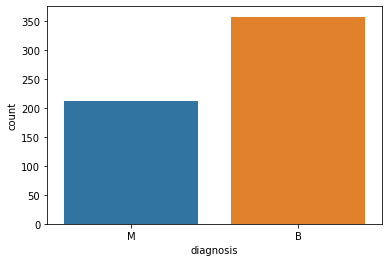

In [5]:
ax = sns.countplot(data['diagnosis'], label= 'Count')

In [6]:
del data['Unnamed: 32']


In [8]:
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [13]:
X = data.iloc[:,2:].values
y = data.iloc[:,1].values

In [17]:
# encode the class lael
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
le = LabelEncoder()
y = le.fit_transform(y)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout


In [20]:
X_train.shape

(455, 30)

In [22]:
model = Sequential()
model.add(Dense(output_dim  = 16,init='uniform',activation='relu',input_dim=30)) # first hidden layers
model.add(Dense(output_dim=16,init='uniform',activation='relu')) # second hidden layers
model.add(Dropout(0.5))
model.add(Dense(output_dim=1,init='uniform',activation='relu')) # output ;ayres
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


C:\Users\Shrikant\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  
C:\Users\Shrikant\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Shrikant\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1, kernel_initializer="uniform")`
  """


In [23]:
model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(X_train, y_train, batch_size=100, nb_epoch=50)

C:\Users\Shrikant\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/50
455/455 [==============================] - 1s 2ms/step - loss: 2.6371 - acc: 0.6286
Epoch 2/50
455/455 [==============================] - 0s 31us/step - loss: 1.7643 - acc: 0.6286
Epoch 3/50
455/455 [==============================] - 0s 42us/step - loss: 1.5974 - acc: 0.6286
Epoch 4/50
455/455 [==============================] - 0s 51us/step - loss: 1.4939 - acc: 0.6286
Epoch 5/50
455/455 [==============================] - 0s 18us/step - loss: 1.4151 - acc: 0.6286
Epoch 6/50
455/455 [==============================] - 0s 47us/step - loss: 1.3316 - acc: 0.6286
Epoch 7/50
455/455 [==============================] - 0s 47us/step - loss: 1.2627 - acc: 0.6286
Epoch 8/50
455/455 [==============================] - 0s 33us/step - loss: 1.1802 - acc: 0.6286
Epoch 9/50
455/455 [==============================] - 0s 26us/step - loss: 1.1175 - acc: 0.6286
Epoch 10/50
455/455 [==============================] - 0s 27us/step - loss: 1.0533 - acc: 0.6286
Epoch 11/50
455/455 [===================

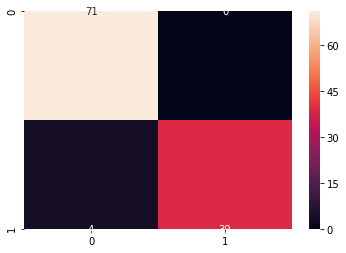

In [28]:
y_pred = model.predict(X_test)
y_pred = y_pred>0.5
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [30]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score, classification_report

print("precision score is:",precision_score(y_test,y_pred))
print("recall score is:",recall_score(y_test,y_pred))
print("f1 score is:",f1_score(y_test,y_pred))
print("classification report is:",classification_report(y_test,y_pred))


precision score is: 1.0
recall score is: 0.9069767441860465
f1 score is: 0.951219512195122
classification report is:               precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

   micro avg       0.96      0.96      0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

